In [1]:
import pandas as pd
import pickle
from holsteinlib import functions
from holsteinlib import genSplit
import matplotlib.pyplot as plt

In [2]:
windowed_dataset_path = 'Datasets/window_dataset_v1.pickle'
save_remapped_windowed_dataset_path = 'Datasets/SixBehaviourClassification/six_label_window_dataset_v1.pickle'
save_six_label_dataset_data_amounts_path = 'Datasets/SixBehaviourClassification/six_label_dataset_data_amounts.csv'

# Importing windowed dataset

In [3]:
# reading window data
with open(windowed_dataset_path, 'rb') as f:
    window_dataset = pickle.load(f)

# Mapping labels to six labels

In [ ]:
# behaviours with the same terminology involved
# drinking_behavs = ['drinking', 'drinking_milk', 'drinking_electrolytes', 'drinking|water']
# grooming = ['grooming', 'grooming|None', 'grooming_lying']
# lying = ['social_nudge_lying', 'grooming_lying', 'tongue_rolling_lying', 'sniff_lying', 'social_groom_lying', 
# 'lying', 'rumination_lying', 'social_sniff_lying']
# walking = ['sniff_walking', 'walking']
# running = ['running']

In [4]:
def remap_label(label):
    
    labels = ['drinking_milk', 'grooming', 'lying', 'walking', 'running']
    
    if label in labels:
        return label
    else:
        return 'other'

In [5]:
remapped_window_dataset = {}

for c_id, calf_data in window_dataset.items():
    remapped_window_dataset[c_id] = {}
    for label, label_data in calf_data.items():
        label_ = remap_label(label)
        if label_ not in remapped_window_dataset[c_id]:
            remapped_window_dataset[c_id][label_] = label_data
        else:
            remapped_window_dataset[c_id][label_] += label_data

In [6]:
with open(save_remapped_windowed_dataset_path, 'wb') as f:
    pickle.dump(remapped_window_dataset, f)

In [7]:
data_amounts_df = functions.get_data_amounter_per_subject(remapped_window_dataset)
data_amounts_df

,subject_id,running,drinking_milk,other,lying,grooming,walking
0,1306,73,45,1582,794,95,29
1,1343,81,328,813,380,112,24
2,1443,60,334,1148,212,453,59
3,1335,55,0,159,0,0,4
4,1357,68,329,588,405,106,83
5,1320,74,332,1747,212,151,55
6,1308,161,281,1455,1859,135,60
7,1302,106,51,1229,1930,154,38
8,1333,28,329,463,59,34,12
9,1351,27,0,248,890,23,27


In [8]:
data_amounts_df = data_amounts_df.sort_values(by='subject_id')
data_amounts_df = data_amounts_df.reset_index(drop=True)
data_amounts_df.to_csv(save_six_label_dataset_data_amounts_path, index=False)

# 6 behaviour dataset analysis

In [9]:
total_data_amounts = {key: value for key, value in data_amounts_df.sum().items() if key != 'subject_id'}

In [10]:
total_data_amounts

{'running': 1329,
 'drinking_milk': 5472,
 'other': 23972,
 'lying': 24967,
 'grooming': 2547,
 'walking': 1015}

## plotting the data

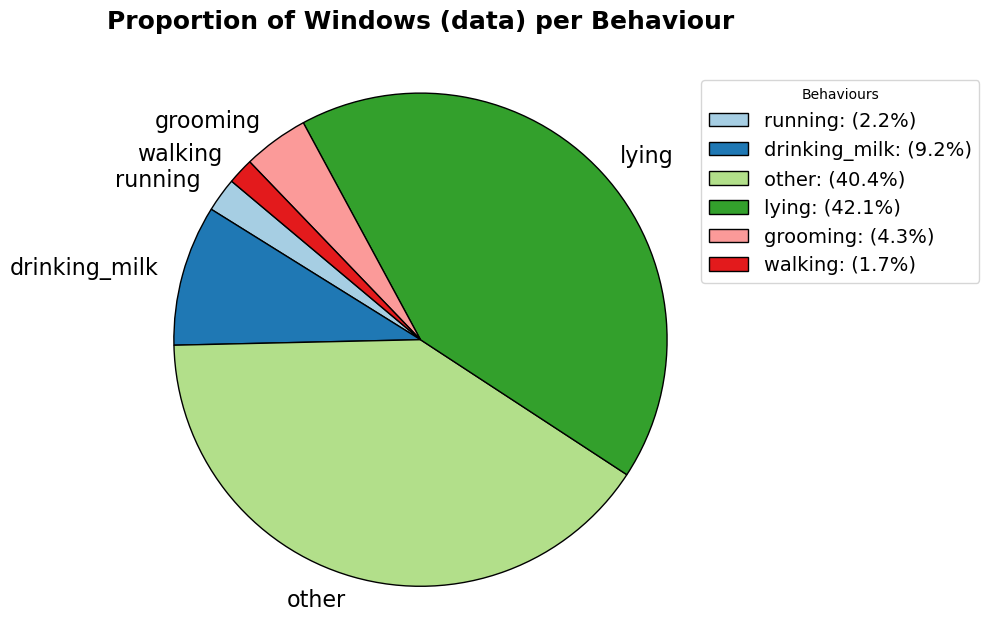

In [11]:
# Create a pie chart with labels around the chart and numbers in the legend
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts = ax.pie(total_data_amounts.values(), 
                       labels=list(total_data_amounts.keys()), 
                       startangle=140, 
                       colors=plt.cm.Paired(range(len(total_data_amounts))),
                       wedgeprops={'edgecolor': 'black'},
                       textprops={'fontsize': 16})

# Create a custom legend with numbers
legend_labels = [f"{label}: ({value}%)" for label, value in zip(total_data_amounts.keys(), [round(val / sum(total_data_amounts.values()) * 100, 1) for val in total_data_amounts.values()])]
ax.legend(wedges, legend_labels, title="Behaviours", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=14)

# Adjust the title
plt.title('Proportion of Windows (data) per Behaviour', fontsize=18, fontweight='bold', loc='center', pad=30)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

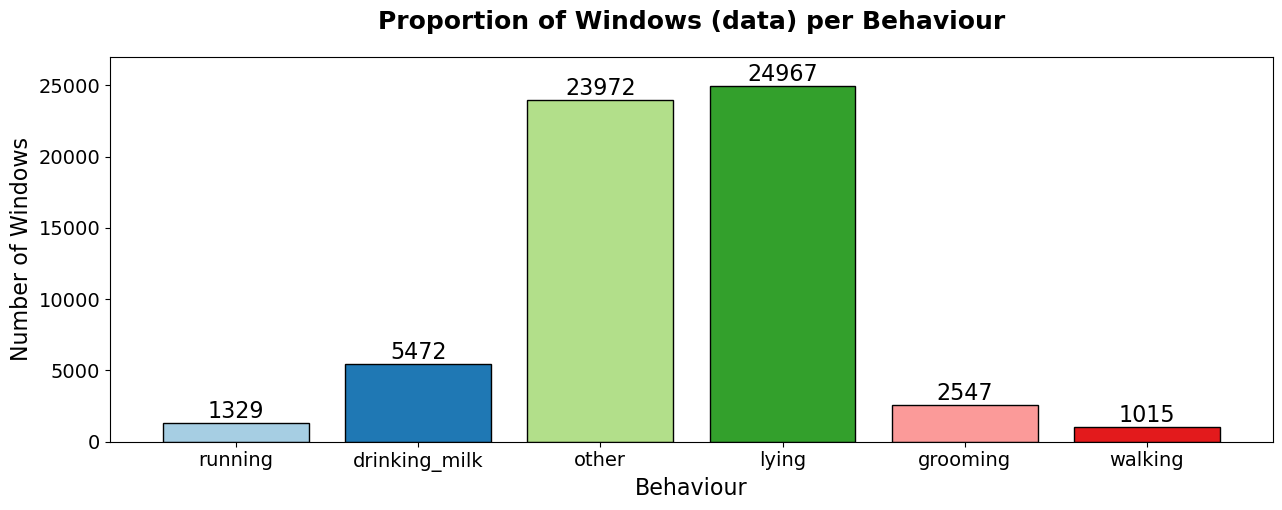

In [12]:
# Create a bar chart with the actual numbers
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(total_data_amounts.keys(), total_data_amounts.values(), color=plt.cm.Paired(range(len(total_data_amounts))), edgecolor='black')

# Add labels to the bars with actual numbers
ax.bar_label(bars, labels=[f'{val}' for val in total_data_amounts.values()], fontsize=16)

# Set title and labels
ax.set_title('Proportion of Windows (data) per Behaviour', fontsize=18, fontweight='bold', pad=20)
ax.set_ylabel('Number of Windows', fontsize=16)
ax.set_xlabel('Behaviour', fontsize=16)

ax.set_ylim(0, 27000)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Plotting behaviours

In [7]:
with open(save_remapped_windowed_dataset_path, 'rb') as f:
    remapped_window_dataset = pickle.load(f)

In [104]:
labels = remapped_window_dataset[1302].keys()

In [112]:
remapped_window_dataset[1443].keys()

dict_keys(['other', 'grooming', 'lying', 'walking', 'drinking_milk', 'running'])

In [115]:
window_dataset[1443].keys()

dict_keys(['oral_manipulation_of_pen', 'grooming', 'standing', 'grooming|None', 'eating_bedding', 'eating_forage', 'lying', 'rising', 'stretch', 'tongue_rolling', 'defecation', 'walking', 'sniff', 'drinking_milk', 'backward', 'social_groom', 'rub', 'running', 'social_sniff', 'jump', 'social_nudge', 'urination', 'sniff_walking', 'lying-down'])

In [4]:
plot_windows = []

plot_windows.append(window_dataset[1443]['drinking_milk'][0])

a = window_dataset[1443]['drinking_milk'][0]
b = window_dataset[1443]['drinking_milk'][1]
b['accX'].iloc[0] = a['accX'].iloc[-1]
b['accY'].iloc[0] = a['accY'].iloc[-1]
b['accZ'].iloc[0] = a['accZ'].iloc[-1]

plot_windows.append(b)

c = window_dataset[1443]['drinking_milk'][2]

c['accX'].iloc[0] = b['accX'].iloc[-1]
c['accY'].iloc[0] = b['accY'].iloc[-1]
c['accZ'].iloc[0] = b['accZ'].iloc[-1]

plot_windows.append(c)

d = window_dataset[1443]['grooming'][0]

d['accX'].iloc[0] = c['accX'].iloc[-1]
d['accY'].iloc[0] = c['accY'].iloc[-1]
d['accZ'].iloc[0] = c['accZ'].iloc[-1]

plot_windows.append(d)

e = window_dataset[1443]['walking'][0]

e['accX'].iloc[0] = d['accX'].iloc[-1]
e['accY'].iloc[0] = d['accY'].iloc[-1]
e['accZ'].iloc[0] = d['accZ'].iloc[-1]

plot_windows.append(e)

f = window_dataset[1443]['walking'][1]

f['accX'].iloc[0] = e['accX'].iloc[-1]
f['accY'].iloc[0] = e['accY'].iloc[-1]
f['accZ'].iloc[0] = e['accZ'].iloc[-1]

plot_windows.append(f)

g = window_dataset[1443]['lying-down'][0]

g['accX'].iloc[0] = f['accX'].iloc[-1]
g['accY'].iloc[0] = f['accY'].iloc[-1]
g['accZ'].iloc[0] = f['accZ'].iloc[-1]

# plot_windows.append(g)

h = window_dataset[1443]['lying'][0]

h['accX'].iloc[0] = g['accX'].iloc[-1]
h['accY'].iloc[0] = g['accY'].iloc[-1]
h['accZ'].iloc[0] = g['accZ'].iloc[-1]

plot_windows.append(h)

i = window_dataset[1443]['lying'][1]

i['accX'].iloc[0] = h['accX'].iloc[-1]
i['accY'].iloc[0] = h['accY'].iloc[-1]
i['accZ'].iloc[0] = h['accZ'].iloc[-1]

plot_windows.append(i)

j = window_dataset[1443]['lying'][2]

j['accX'].iloc[0] = i['accX'].iloc[-1]
j['accY'].iloc[0] = i['accY'].iloc[-1]
j['accZ'].iloc[0] = i['accZ'].iloc[-1]

plot_windows.append(j)

k = window_dataset[1443]['rising'][0]

k['accX'].iloc[0] = j['accX'].iloc[-1]
k['accY'].iloc[0] = j['accY'].iloc[-1]
k['accZ'].iloc[0] = j['accZ'].iloc[-1]

# plot_windows.append(k)

l = window_dataset[1443]['running'][0]

l['accX'].iloc[0] = k['accX'].iloc[-1]
l['accY'].iloc[0] = k['accY'].iloc[-1]
l['accZ'].iloc[0] = k['accZ'].iloc[-1]

plot_windows.append(l)

m = window_dataset[1443]['running'][1]

m['accX'].iloc[0] = l['accX'].iloc[-1]
m['accY'].iloc[0] = l['accY'].iloc[-1]
m['accZ'].iloc[0] = l['accZ'].iloc[-1]

plot_windows.append(m)


# for label, windows in remapped_window_dataset[1443].items():
#     plot_labels.append(label)
#     fg = windows[0]
#     if fg.behaviour.unique()[0] not in labels:
#         fg['behaviour'] = ['other'] * len(fg)
#     plot_windows.append(fg)
#     window_lens.append(len(windows[0]))
#     continue
    
plot_dataframe = pd.concat(plot_windows)
continuous_dates = pd.date_range(start='2022-01-01', periods=len(plot_dataframe), freq='s')
plot_dataframe['new_dateTime'] = continuous_dates

/tmp/ipykernel_633624/562408879.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  b['accX'].iloc[0] = a['accX'].iloc[-1]
/tmp/ipykernel_633624/562408879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [11]:
plot_windows = []

# Function to append windows with gaps
def append_with_gap(window):
    if plot_windows:
        # Create a gap by inserting NaNs
        gap = pd.DataFrame({
            'accX': [np.nan],
            'accY': [np.nan],
            'accZ': [np.nan]
        })
        plot_windows.append(gap)
        plot_windows.append(gap)
        plot_windows.append(gap)
    plot_windows.append(window)

# Append windows with gaps
a = window_dataset[1443]['drinking_milk'][0]
append_with_gap(a)

b = window_dataset[1443]['drinking_milk'][1]
b['accX'].iloc[0] = a['accX'].iloc[-1]
b['accY'].iloc[0] = a['accY'].iloc[-1]
b['accZ'].iloc[0] = a['accZ'].iloc[-1]
append_with_gap(b)

c = window_dataset[1443]['drinking_milk'][2]
c['accX'].iloc[0] = b['accX'].iloc[-1]
c['accY'].iloc[0] = b['accY'].iloc[-1]
c['accZ'].iloc[0] = b['accZ'].iloc[-1]
append_with_gap(c)

d = window_dataset[1443]['grooming'][0]
d['accX'].iloc[0] = c['accX'].iloc[-1]
d['accY'].iloc[0] = c['accY'].iloc[-1]
d['accZ'].iloc[0] = c['accZ'].iloc[-1]
append_with_gap(d)

e = window_dataset[1443]['walking'][0]
e['accX'].iloc[0] = d['accX'].iloc[-1]
e['accY'].iloc[0] = d['accY'].iloc[-1]
e['accZ'].iloc[0] = d['accZ'].iloc[-1]
append_with_gap(e)

f = window_dataset[1443]['walking'][1]
f['accX'].iloc[0] = e['accX'].iloc[-1]
f['accY'].iloc[0] = e['accY'].iloc[-1]
f['accZ'].iloc[0] = e['accZ'].iloc[-1]
append_with_gap(f)

g = window_dataset[1443]['lying-down'][0]
g['accX'].iloc[0] = f['accX'].iloc[-1]
g['accY'].iloc[0] = f['accY'].iloc[-1]
g['accZ'].iloc[0] = f['accZ'].iloc[-1]
# append_with_gap(g)

h = window_dataset[1443]['lying'][0]
h['accX'].iloc[0] = g['accX'].iloc[-1]
h['accY'].iloc[0] = g['accY'].iloc[-1]
h['accZ'].iloc[0] = g['accZ'].iloc[-1]
append_with_gap(h)

i = window_dataset[1443]['lying'][1]
i['accX'].iloc[0] = h['accX'].iloc[-1]
i['accY'].iloc[0] = h['accY'].iloc[-1]
i['accZ'].iloc[0] = h['accZ'].iloc[-1]
append_with_gap(i)

j = window_dataset[1443]['lying'][2]
j['accX'].iloc[0] = i['accX'].iloc[-1]
j['accY'].iloc[0] = i['accY'].iloc[-1]
j['accZ'].iloc[0] = i['accZ'].iloc[-1]
append_with_gap(j)

k = window_dataset[1443]['rising'][0]
k['accX'].iloc[0] = j['accX'].iloc[-1]
k['accY'].iloc[0] = j['accY'].iloc[-1]
k['accZ'].iloc[0] = j['accZ'].iloc[-1]
# append_with_gap(k)

l = window_dataset[1443]['running'][0]
l['accX'].iloc[0] = k['accX'].iloc[-1]
l['accY'].iloc[0] = k['accY'].iloc[-1]
l['accZ'].iloc[0] = k['accZ'].iloc[-1]
append_with_gap(l)

m = window_dataset[1443]['running'][1]
m['accX'].iloc[0] = l['accX'].iloc[-1]
m['accY'].iloc[0] = l['accY'].iloc[-1]
m['accZ'].iloc[0] = l['accZ'].iloc[-1]
append_with_gap(m)

# Combine all windows into a single DataFrame
plot_dataframe = pd.concat(plot_windows)

# Create continuous date range
continuous_dates = pd.date_range(start='2022-01-01', periods=len(plot_dataframe), freq='s')
plot_dataframe['new_dateTime'] = continuous_dates

/tmp/ipykernel_633624/2227856724.py:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  b['accX'].iloc[0] = a['accX'].iloc[-1]
/tmp/ipykernel_633624/2227856724.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [8]:
plot_dataframe

,dateTime,calfId,segId,accX,accY,accZ,adjMag,ODBA,VeDBA,pitch,roll,behaviour,new_dateTime
0,2022-02-21 06:03:21.028602,1443.0,639.0,0.890625,-0.390625,0.000000,0.000000,0.189282,0.143673,0.000000,-23.682088,drinking_milk,2022-01-01 00:00:00
1,2022-02-21 06:03:21.068603,1443.0,639.0,0.906250,-0.406250,0.031250,0.000000,0.495972,0.373453,0.195840,-23.732284,drinking_milk,2022-01-01 00:00:01
2,2022-02-21 06:03:21.108604,1443.0,639.0,0.890625,-0.390625,0.031250,0.000000,0.157042,0.112431,0.415227,-23.776786,drinking_milk,2022-01-01 00:00:02
3,2022-02-21 06:03:21.148605,1443.0,639.0,0.796875,-0.390625,0.062500,0.000000,0.335110,0.244428,0.673711,-23.830287,drinking_milk,2022-01-01 00:00:03
4,2022-02-21 06:03:21.188606,1443.0,639.0,0.812500,-0.359375,0.062500,0.000000,0.104480,0.085604,0.997925,-23.911813,drinking_milk,2022-01-01 00:00:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2022-02-21 06:47:07.549542,1443.0,701.0,1.078125,-0.265625,0.140625,0.119234,0.174694,0.133421,12.366582,-5.401510,running,2022-01-01 00:14:05
73,2022-02-21 06:47:07.589543,1443.0,701.0,0.937500,-0.187500,0.140625,0.000000,0.106456,0.063581,8.845233,-8.534006,running,2022-01-01 00:14:06
74,2022-02-21 06:47:07.627544,1443.0,701.0,0.875000,-0.140625,0.140625,0.000000,0.195043,0.139489,5.274102,-13.864504,running,2022-01-01 00:14:07
75,2022-02-21 06:47:07.667546,1443.0,701.0,0.843750,-0.140625,0.156250,0.000000,0.105288,0.062832,4.019268,-16.510978,running,2022-01-01 00:14:08


/tmp/ipykernel_633624/3190315591.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(plot_dataframe['behaviour'].unique()))


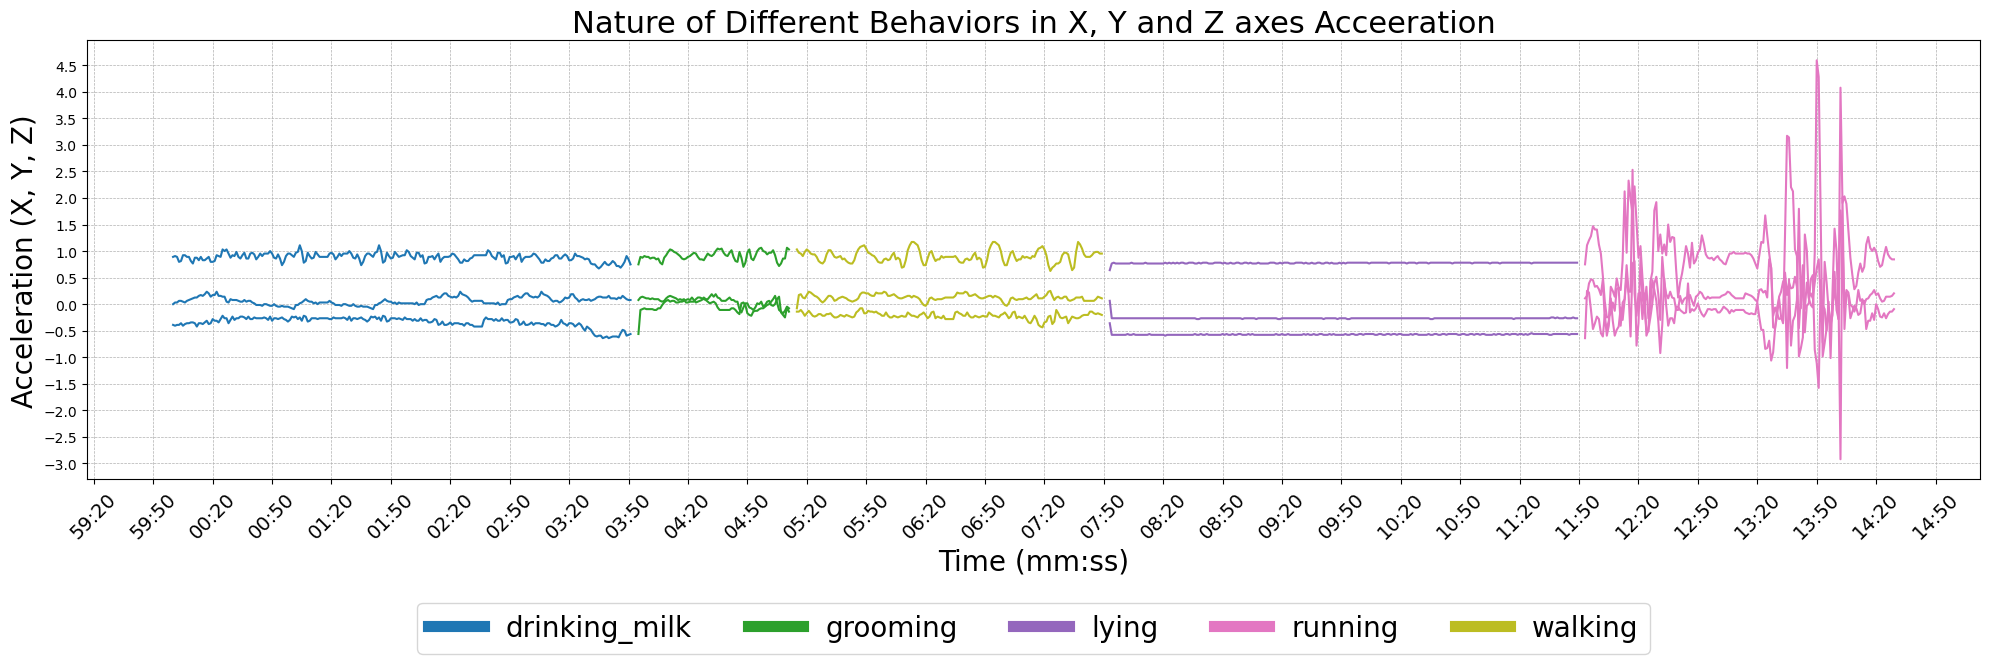

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D

plt.rcParams['figure.figsize'] = (20,7)
# Plotting
fig, ax = plt.subplots()

# Define a color map
colors = plt.cm.get_cmap('tab10', len(plot_dataframe['behaviour'].unique()))

# Plot each segment with a different color
for i, (behaviour, segment) in enumerate(plot_dataframe.groupby('behaviour')):
    ax.plot(segment['new_dateTime'], segment['accX'], label=behaviour, color=colors(i))
    ax.plot(segment['new_dateTime'], segment['accY'], color=colors(i))
    ax.plot(segment['new_dateTime'], segment['accZ'], color=colors(i))

# Formatting the plot
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

ax.xaxis.set_major_locator(mdates.SecondLocator(interval=30))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

ax.set_title('Nature of Different Behaviors in X, Y and Z axes Acceeration', fontsize=22)
ax.set_xlabel('Time (mm:ss)', fontsize=20)
ax.set_ylabel('Acceleration (X, Y, Z)', fontsize=20)

# Customize legend
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], color=h.get_color(), linewidth=8) for h in handles]
ax.legend(handles=new_handles, labels=labels, fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=len(labels))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))

plt.xticks(fontsize=14, rotation=45)
plt.tight_layout()
plt.show()
